In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Create color maps
cmap_list = ['orange', 'cyan', 'cornflowerblue']
cmap_bold = ['darkorange', 'c', 'darkblue']
cmap_light = ListedColormap(cmap_list)

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

<!-- dom:TITLE: Homework 1, PHY 959 -->
<!-- dom:AUTHOR: [PHY 959: Machine Learning in Physics]-->


# Regularization




___
***


We will explore how choice of loss function and regularization impacts bias vs variance.  Recall that bias is related to the loss found relative to the training data.  And variance is related to the loss found relative to future data.  So the bias-variance tradeoff lies in the problem of overfitting (variance!) vs underfitting (bias!)


Recall that bias enters the expected loss equation as the square of the difference between the true function and the expectation of the fitted function for future data:

$\left( E[\hat{f}_e(x)] - f(x) \right)^2$

To study bias, we will make a polynomial model that has many degrees of freedom.  This should allow us to fit most any distribution.  To exacerbate the problem, we'll add an outlier that will cause the Mean Squared Error (MSE) fit heavily overtrain.

Recall that variance enters the expected loss equation as the expectation value (evaluated using future data) of the difference between the fitted function and the expectation of the fitted function for future data.

$E_e\left[ \left( \hat{f}_t(x) - E[\hat{f}_e(x)] \right)^2 \right]$

To study variance, we will need to train a model and then compare to data that was not included in the training.  If we compare to many random testing data samples, we can look at the distribution of loss and see how large the expected loss is.  

___
***

# Start by making data

In [2]:
# We'll make lots of data this time, so best make a function
def makeLinearData(nPts, doSort, doOutlier):
    X = np.random.uniform(0,1,nPts)
    y = 0.5*X+np.random.randn(nPts)*0.05
    
    if doSort:
        permute = X.argsort()
        X=X[permute]
        y=y[permute]
    
    if doOutlier:
        y[7] -= 2.5
    
    return X, y

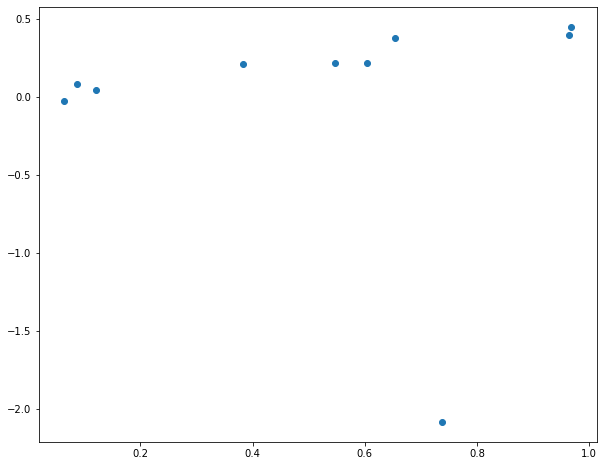

In [3]:
# Build and visualize the data

# Make some training data
# Don't need formal data
nPts = 10
np.random.seed(221)
Xtrain, ytrain = makeLinearData(nPts,True,True)

plt.scatter(Xtrain,ytrain)
plt.show()

---
---
# Make a polynomial design matrix

We want to fit a polynomial to our data, so we need a polynomial design matrix.  We won't always use scikit-learn out of the box, but here we will use the PolynomialFeatures module.  This is just a useful tool that allows you to take one variable ($x$) and create a polynomial sequence:

$x+x^2+x^3+x^4+\cdots$  

Note that the design matrix that it builds automatically includes the bias or offset term.  In this cell, we're going to make a 9th order polynomial design matrix.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

nDegr = 9 #let's make sure we can hit every point by having enough degrees of freedom

xt = np.zeros((Xtrain.size,1))
xt[:,0] = Xtrain

poly = PolynomialFeatures(degree=nDegr)
DM = poly.fit_transform(xt)

print(DM)

[[1.00000000e+00 6.38932933e-02 4.08235293e-03 2.60834973e-04
  1.66656054e-05 1.06482042e-06 6.80348831e-08 4.34697274e-09
  2.77742404e-10 1.77458769e-11]
 [1.00000000e+00 8.77121921e-02 7.69342864e-03 6.74807491e-04
  5.91888442e-05 5.19158327e-06 4.55365149e-07 3.99410755e-08
  3.50331928e-09 3.07283814e-10]
 [1.00000000e+00 1.20432923e-01 1.45040890e-02 1.74676983e-03
  2.10368597e-04 2.53353051e-05 3.05120485e-06 3.67465519e-07
  4.42549466e-08 5.32975258e-09]
 [1.00000000e+00 3.83575558e-01 1.47130209e-01 5.64355518e-02
  2.16472983e-02 8.30337451e-03 3.18497151e-03 1.22167722e-03
  4.68605523e-04 1.79745625e-04]
 [1.00000000e+00 5.46570734e-01 2.98739567e-01 1.63282305e-01
  8.92453292e-02 4.87788851e-02 2.66611110e-02 1.45721830e-02
  7.96472878e-03 4.35328766e-03]
 [1.00000000e+00 6.03501582e-01 3.64214159e-01 2.19803821e-01
  1.32651954e-01 8.00556640e-02 4.83137199e-02 2.91574064e-02
  1.75965409e-02 1.06195403e-02]
 [1.00000000e+00 6.54489716e-01 4.28356789e-01 2.80355113e

---
---
# Fit the data using MSE

Let's enjoy the analytical solution of MSE to get a *VERY* overfitted result!


[ 1.31870372e+01 -6.18895379e+02  1.11309348e+04 -9.89367772e+04
  4.79516169e+05 -1.35440646e+06  2.29244594e+06 -2.28900212e+06
  1.24178404e+06 -2.81933707e+05]


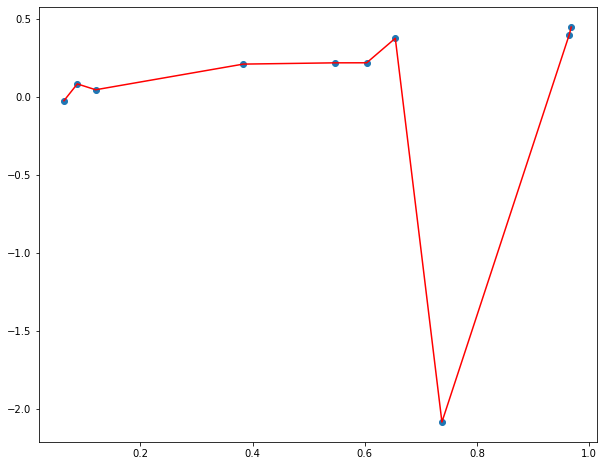

In [5]:
#calculate our betas
betas = np.linalg.inv(DM.T.dot(DM)).dot(DM.T).dot(ytrain)

#print out our betas
print(betas)

#make a line!
line = np.dot(DM,betas)

#plot the line!
plt.plot(Xtrain,line,c='red')
plt.scatter(Xtrain,ytrain)
plt.show()

---
---
# Study of the bias in this case

If we repeat this process many times, we can get an estimate of the bias.  Note that here we are including the outlier in the training data, which allows us to show how often we can get a good fit. 


Training loss:
 2.0141085531589667e-05
oops, singular matrix!
oops, singular matrix!
oops, singular matrix!
oops, singular matrix!
Mean bias-squared:
 0.07476779966699298


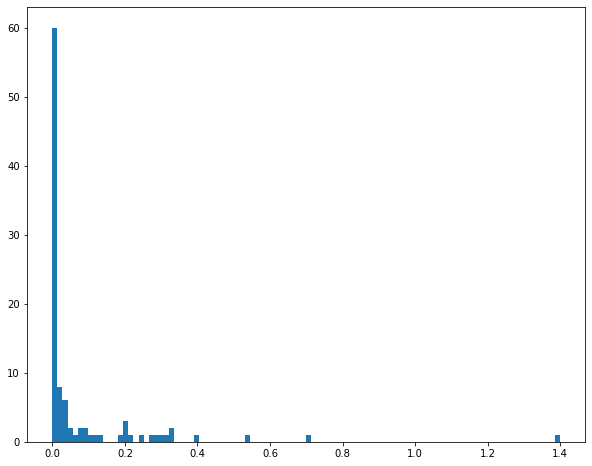

In [6]:
# compute mean squared loss
fhat = np.dot(DM,betas)
print("Training loss:\n",np.sum((ytrain-fhat)**2))

Ntrials = 100
biases = np.zeros(Ntrials)

# make many copies of random data and fit them
for idx in range(Ntrials):
    iX, iy = makeLinearData(nPts,doSort=True,doOutlier=True)
    xt[:,0] = iX
    iDM = poly.fit_transform(xt)
        
    try:
        ibeta = np.linalg.inv(iDM.T.dot(iDM)).dot(iDM.T).dot(iy)
    except np.linalg.LinAlgError as e:
        print("oops, singular matrix!")
        continue
        
    fhat = np.dot(iDM,ibeta)
    
    # compute mean squared loss
    biases[idx] = np.sum((iy-fhat)**2)
    biases[idx] /= nPts


origMeanBias = np.mean(biases)
print("Mean bias-squared:\n",origMeanBias)
plt.hist(biases,100)
plt.show()

---
---
# Now let's study the variance for this fit

We will make more data and compare it to our best fit from our training data sample.  In this case, we will use the MSE as our metric for a good fit.

Training loss:
 2.0141085531589667e-05
Mean variance:
 12.95036422660545


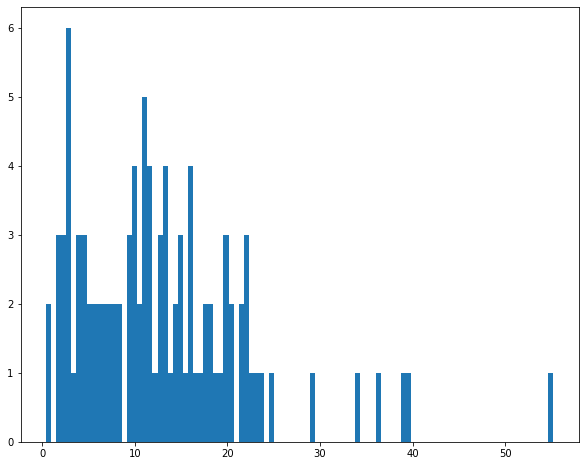

Total error for unconstrained MSE model:  13.025132026272443


In [7]:
fhat = np.dot(DM,betas)

# compute mean squared loss
print("Training loss:\n",np.sum((ytrain-fhat)**2))

losses = np.zeros(Ntrials)

xt = np.zeros((Xtrain.size,1))

for idx in range(Ntrials):
    iX, iy = makeLinearData(nPts,doSort=False,doOutlier=False)
    xt[:,0] = iX
    iDM = poly.fit_transform(xt)
    fhat = np.dot(iDM,betas)
    
    # compute mean squared loss
    losses[idx] = np.sum((iy-fhat)**2)
    losses[idx] /= nPts

origMeanVar = np.mean(losses)
print("Mean variance:\n",np.mean(losses))
plt.hist(losses,100)
plt.show()

print("Total error for unconstrained MSE model: ",origMeanBias+origMeanVar)

# Experiment with loss functions and regularization

Now let's move over to fitting by hand so that we can introduce different loss functions and add regularization.  In this case we'll compare MSE with Mean Average Error (MAE) for loss functions.  We'll also look at the regularization strength to gain some intuition for how large it should be.

A few good questions:
  1.  We expect MAE to do better against fitting outliers.  Does it?
  2.  How big should the regularization strength be?  Should this give a contribution to the loss that is larger than the MSE or MAE?  Smaller?  Roughly the same size?
  3.  Is the combination of MSE or MAE with regularization better?  Why?

iteration 0: loss 0.445065
iteration 100000: loss 0.293929
iteration 200000: loss 0.312445
iteration 300000: loss 0.306085

Final Weights:
 [ 0.05678805  0.3672383   0.07747845 -0.03333625 -0.04994068 -0.03161596
 -0.00367301  0.02398401  0.04786441  0.0671072 ]


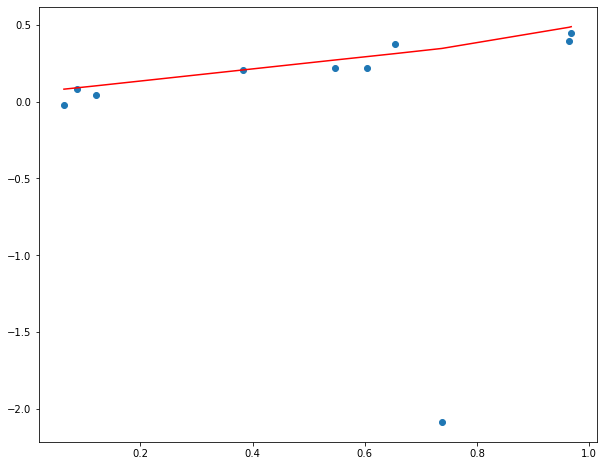

In [10]:
#Linear regression by hand

# initialize parameters randomly
W = 0.1*np.random.randn(nDegr+1)

# some hyperparameters
step_size = 0.1  # why not make this 1.0?
reg = 0.0 # regularization strength, =0 means no regularization!

Niter = 300001

doMSE = True

# gradient descent loop
for i in range(Niter):
  
    # evaluate function values
    # fhat = W^TX +b
    fhat = np.dot(DM,W) 
    
    if doMSE:
        # compute mean squared loss
        data_loss = np.sum((ytrain-fhat)**2)
    else: 
        # compute mean absolute loss
        data_loss = np.sum(np.abs(ytrain-fhat))
        
    data_loss /= nPts
    
    # This is L2 regularization, see Lecture 5
    reg_loss = 0.5*reg*np.sum(W*W)
    
    # Total loss is the sum
    loss = reg_loss + data_loss
    
    if i % 100000 == 0:
        print("iteration %d: loss %f" % (i, loss))
    
    #compute the loss gradients
    if doMSE:
        dW = -2*np.dot(DM.T,(ytrain-fhat)) #MSE gradient
    else:
        dW = -1*np.dot(DM.T,np.sign(ytrain-fhat)) #MAE gradient
        
    dW /= ytrain.size
    
    dW += reg*W # regularization gradient

    W -= step_size*dW
    
    
#let's see what we got!
print("\nFinal Weights:\n",W)

#make a line!
line = np.dot(DM,W)

#plot the line!
plt.scatter(Xtrain,ytrain)
plt.plot(Xtrain,line,c="red")
plt.show()

# One final look at variance 

After we've settled on a loss and regularization scheme, let's recheck our variance.  We know that the bias has gone up once we depart from the "perfect fit" scenario, but we hope that variance has gone down by a similar amount.

Training loss:
 5.942576115340892
Mean variance:
 0.0032198083308498542


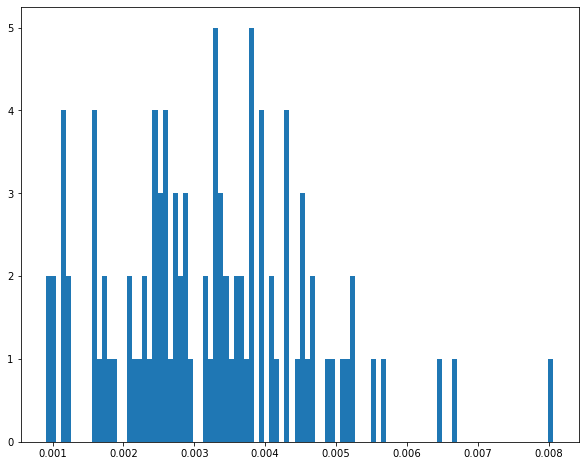

Total error for unconstrained MSE model:
 13.025132026272443
Total error for constrained model:
 5.945795923671742


In [11]:
fhat = np.dot(DM,W)

# compute mean squared loss
train_loss = np.sum((ytrain-fhat)**2)

print("Training loss:\n",train_loss)

for idx in range(Ntrials):
    iX, iy = makeLinearData(nPts,0,0)
    xt[:,0] = iX
    iDM = poly.fit_transform(xt)
    fhat = np.dot(iDM,W)
    
    # compute mean squared loss
    losses[idx] = np.sum((iy-fhat)**2)
    losses[idx] /= nPts     


print("Mean variance:\n",np.mean(losses))
plt.hist(losses,100)
plt.show()

print("Total error for unconstrained MSE model:\n",origMeanBias+origMeanVar)
print("Total error for constrained model:\n",train_loss+np.mean(losses))